### Multi Layer Perceptron on Fashion MNIST Dataset

---

**Problem Statement**
- The dataset is similar to `MNIST`, but includes images of certain clothing and accessory. 
- The objective is to `classify images into specific classes` using single layer perceptron and multilayer perceptron. 

**Dataset**
- Total Images - 70,000 
- Train Images - 60,000 
- Test Images - 10,000
- Image Size - 28 X 28

**Different Classes**
- Classes - 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'

---

**Question 1**
1. **A** - Reshape and Normalize the data:
    - reshape the input image
        - train: 60000,28 * 28 * 1
        - test: 10000, 28 * 28 * 1
    - change the type of data to float32
    - normalize the data by dividing with 255
2. **B** - Convert the y_train and y_test to categorical by using keras to_categorical function and define num_classes=10

---

**Question 2**
 - Write a multi layer perceptron using tensorflow for fashion MNIST data to classify all 10 classes. Solve for each questions
>Take epoch= 2000

    - **A** - Define a function that creates 4 layers using TensorFlow layers
    - **B** - Create a function for defining the weights and biases for the 4 layers
    - **C** - Call the function
        - y = multilayer_perceptron(x, weights, biases)
    - **D** - Define Cost function and Optimizer
        - Cost: tf.nn.softmax_cross_entropy_with_logits
        - Optimizer: tf.train.GradientDescentOptimizer
        - Initiate the training

---

**Question 3**
- Similarly like MLP define a function that can create single layer network called perceptron on Fashion MNIST.
    - Learning rate: 0.0001
    - Epochs: 5000
    - Hint: Use the hints given in MLP questions. Also, make sure to correctly check for layers that are going to be input to output layer.

---

**Question 4**
- Now, initialize variables, cost function and optimizer to initiate the training - use `Adam Optimizer`

### Importing the modules

In [1]:
# Using Tensorflow v1
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, load_model

from keras.datasets.mnist import load_data
from keras.utils.vis_utils import plot_model
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout, Layer
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD

print('The TensorFlow version being used is:', tf.__version__)

The TensorFlow version being used is: 1.15.2


Using TensorFlow backend.


### Loading the Fashion MNIST dataset from Keras Library

In [4]:
fmnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fmnist.load_data()

### Visualizing the FMNIST Dataset

In [5]:
# Mapping label numbers to actual product name

class_names = ['T-shirt/top', # Index 0
               'Trouser',     # Index 1
               'Pullover',    # Index 2
               'Dress',       # Index 3 
               'Coat',        # Index 4
               'Sandal',      # Index 5
               'Shirt',       # Index 6
               'Sneaker',     # Index 7
               'Bag',         # Index 8
               'Ankle boot']  # Index 9

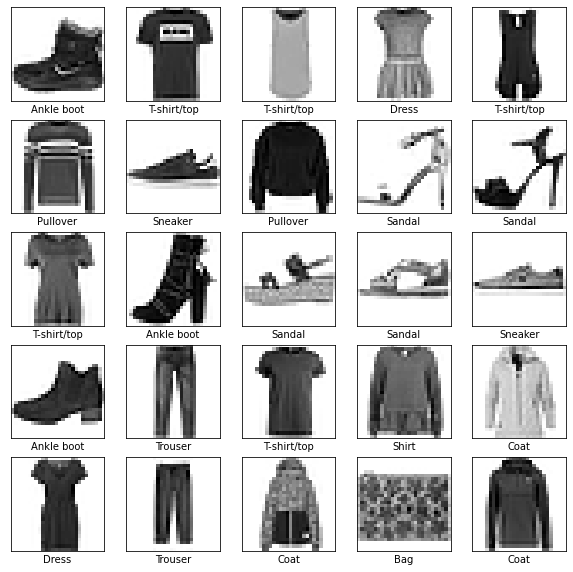

In [6]:
'''
The Fashion MNIST data labels does not contain 
the actual product name rather the index numbers
Hence, I have defined a variable, class_names that
maps the index numbers to the actual product names.
'''
# First 25 images with labels

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## Question 1

**A**
  - Reshape the input image
  - Change the data type to float32
  - Normalize the input data

In [7]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(X_train)))
print("- Validation-set:\t{}".format(len(X_test)))

Size of:
- Training-set:		60000
- Validation-set:	10000


In [8]:
print('X_train Data Shape:\t{}'.format(X_train.shape))
print('X_test Data Shape:\t{}'.format(X_test.shape))
print('y_train Data Shape:\t{}'.format(y_train.shape))
print('y_test Data Shape:\t{}'.format(y_test.shape))

X_train Data Shape:	(60000, 28, 28)
X_test Data Shape:	(10000, 28, 28)
y_train Data Shape:	(60000,)
y_test Data Shape:	(10000,)


In [9]:
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))
print('Training data dimensions after reshaping:', X_train.shape)

Training data dimensions after reshaping: (60000, 28, 28, 1)


In [10]:
# Change the type of data to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [11]:
# Normalizing the RGB codes by dividing it to the max RGB value
X_train = X_train / 255.0
X_test = X_test / 255.0

**B** 
  - Convert the y_train and y_test to categorical by using keras_to_categorical function
  - define num_classes=10

In [12]:
# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=10, dtype='float32')
y_test = to_categorical(y_test, num_classes=10, dtype='float32')

## Question 2
 - Write a multi layer perceptron using tensorflow for fashion MNIST data to classify all 10 classes. Solve for each questions
>Take epoch= 2000

- **A** - Define a function that creates 4 layers using TensorFlow layers
- **B** - Create a function for defining the weights and biases for the 4 layers
- **C** - Call the function
  - y = multilayer_perceptron(x, weights, biases)
- **D** - Define Cost function and Optimizer
  - Cost: tf.nn.softmax_cross_entropy_with_logits
  - Optimizer: tf.train.GradientDescentOptimizer
  - Initiate the training

In [13]:
# Re-loading Fashion MNIST Dataset
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets("path/of/fashion-mnist", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting path/of/fashion-mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting path/of/fashion-mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting path/of/fashion-mnist/t10k-images-idx3-ubyte.gz
Extracting path/of/fashion-mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [14]:
# Hyperparameter
learning_rate = 0.001
epochs = 2000
learning_rate_1 = 0.0001
epochs_1 = 5000
batch_size = 100
cost_history = np.empty(shape = [1], dtype = float)
n_class = 10      # F-MNIST total classes (0-9 digits)
display_step = 1
n_input = 784     # Input Size
n_classes = 10    # MNIST total classes (0-9 digits)
# n_dim = X_train.shape[1]
# print("n_dim:", n_dim)

In [15]:
# Network Parameters
# Creating 4 hidden layers
h_1 = 256    # 1st layer number of neurons
h_2 = 256    # 2nd layer number of neurons
h_3 = 256    # 3rd layer number of neurons
h_4 = 256    # 4th layer number of neurons

In [16]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

In [17]:
# Define and store Weight & Biases
weights = {'h1': tf.Variable(tf.random_normal([n_input, h_1])),
           'h2': tf.Variable(tf.random_normal([h_1, h_2])),
           'h3': tf.Variable(tf.random_normal([h_2, h_2])),
           'h4': tf.Variable(tf.random_normal([h_3, h_2])),
           'out': tf.Variable(tf.random_normal([h_4, n_classes]))
           }

biases = {'b1': tf.Variable(tf.random_normal([h_1])),
          'b2': tf.Variable(tf.random_normal([h_2])),
          'b3': tf.Variable(tf.random_normal([h_3])),
          'b4': tf.Variable(tf.random_normal([h_4])),
          'out': tf.Variable(tf.random_normal([n_classes]))
          }

In [18]:
# Create MLP model
def multilayer_perceptron(x):
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    
    return out_layer

logits = multilayer_perceptron(X)

In [19]:
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
                         logits=logits, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [20]:
# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    

    for epoch in range(epochs):
        avg_cost = 0.
        total_batch = int(fashion_mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_x, batch_y = fashion_mnist.train.next_batch(batch_size)
        
            z, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,
                                                            Y: batch_y})
            
            avg_cost += c / total_batch
        
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
    
    print("Optimization Finished!")



    # Test model
    pred = tf.nn.softmax(logits)  
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))      

    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: fashion_mnist.test.images, Y: fashion_mnist.test.labels}))

Epoch: 0001 cost=58132.442529297
Epoch: 0002 cost=16465.414736328
Epoch: 0003 cost=12004.694199219
Epoch: 0004 cost=9818.931323242
Epoch: 0005 cost=8310.570893555
Epoch: 0006 cost=7424.255049716
Epoch: 0007 cost=6603.397120694
Epoch: 0008 cost=6278.892734708
Epoch: 0009 cost=5660.820127397
Epoch: 0010 cost=5251.763348056
Epoch: 0011 cost=5185.595196866
Epoch: 0012 cost=4735.221157005
Epoch: 0013 cost=4684.162015048
Epoch: 0014 cost=4382.062551464
Epoch: 0015 cost=4103.333327415
Epoch: 0016 cost=3884.767027199
Epoch: 0017 cost=3725.854797863
Epoch: 0018 cost=3576.121991855
Epoch: 0019 cost=3401.249481257
Epoch: 0020 cost=3223.411702992
Epoch: 0021 cost=3100.399977750
Epoch: 0022 cost=3003.709463667
Epoch: 0023 cost=2838.245575062
Epoch: 0024 cost=2721.566862793
Epoch: 0025 cost=2599.223678700
Epoch: 0026 cost=2481.282609253
Epoch: 0027 cost=2409.658189919
Epoch: 0028 cost=2343.428719150
Epoch: 0029 cost=2204.358719704
Epoch: 0030 cost=2135.449403132
Epoch: 0031 cost=2053.112977184
Epoch

In [21]:
# Create SLP model
def singlelayer_perceptron(x):
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])    
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    
    return out_layer

logits = multilayer_perceptron(X)

In [22]:
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
                         logits=logits, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_1)
train_op = optimizer.minimize(loss_op)

In [24]:
# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    

    for epoch in range(epochs_1):
        avg_cost = 0.
        total_batch = int(fashion_mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_x, batch_y = fashion_mnist.train.next_batch(batch_size)
        
            z, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,
                                                            Y: batch_y})
            
            avg_cost += c / total_batch
        
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
    print("Optimization Finished!")



    # Test model
    pred = tf.nn.softmax(logits)  
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))      

    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: fashion_mnist.test.images, Y: fashion_mnist.test.labels}))

Streaming output truncated to the last 5000 lines.
Epoch: 0004 cost=34039.765965909
Epoch: 0005 cost=28164.046371626
Epoch: 0006 cost=24006.626363636
Epoch: 0007 cost=20904.445256570
Epoch: 0008 cost=18557.759754972
Epoch: 0009 cost=16622.896973988
Epoch: 0010 cost=15046.931725852
Epoch: 0011 cost=13730.213309659
Epoch: 0012 cost=12549.148645685
Epoch: 0013 cost=11661.557450062
Epoch: 0014 cost=10834.191043146
Epoch: 0015 cost=10107.682546387
Epoch: 0016 cost=9468.327731490
Epoch: 0017 cost=8931.635863481
Epoch: 0018 cost=8434.225606357
Epoch: 0019 cost=7956.776336226
Epoch: 0020 cost=7571.046425337
Epoch: 0021 cost=7180.509796919
Epoch: 0022 cost=6833.534180908
Epoch: 0023 cost=6466.435438010
Epoch: 0024 cost=6221.545999201
Epoch: 0025 cost=5944.686089755
Epoch: 0026 cost=5663.978047097
Epoch: 0027 cost=5452.834385099
Epoch: 0028 cost=5218.544292991
Epoch: 0029 cost=5000.801825978
Epoch: 0030 cost=4828.403109131
Epoch: 0031 cost=4631.563533963
Epoch: 0032 cost=4486.460199640
Epoch: 00